In [2]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline
import yaml


# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline




cuda


In [16]:
from tqdm import tqdm
import pickle as pk
import dill
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_galaxies_sigpos_8/'
pos = 'rsd'
isim_array = np.arange(0,2000)

pk_type_all = ['mono', 'quad', 'all']
do_wavelets_all = ['s0_s1_s2', 's1_s2', 's1', 'None']

for pk_type in pk_type_all:
    for do_wavelets in do_wavelets_all:
        x_all = []
        x_all_truth = []
        theta_all = []
        for ji in tqdm(range(len(isim_array))):
            isim = isim_array[ji]
            try:
                saved_j = pk.load(open(ldir_stats + '/Pk_Bk_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
                saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
                
                for ihod in range(10):
                    if pk_type == 'mono':
                        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:1].T
                        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:1].T
                    
                    if pk_type == 'quad':
                        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:2].T
                        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:2].T
                    
                    if pk_type == 'all':
                        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:3].T
                        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:3].T



                    Bk_truth_k0p06 = saved_j[pos + f'_Bk_truth_0p08_{ihod}'][1:-1]
                    Bk_mock_k0p06 = saved_j[pos + f'_Bk_mock_0p08_{ihod}'][1:-1]

                    Bk_truth_k0p2 = saved_j[pos + f'_Bk_truth_0p16_{ihod}'][1:-1]
                    Bk_mock_k0p2 = saved_j[pos + f'_Bk_mock_0p16_{ihod}'][1:-1]

                    Bk_truth_k0p3 = saved_j[pos + f'_Bk_truth_0p32_{ihod}'][1:-1]
                    Bk_mock_k0p3 = saved_j[pos + f'_Bk_mock_0p32_{ihod}'][1:-1]

                    s0_mock = saved_w[pos + f'_s0_mock_{ihod}']
                    s0_truth = saved_w[pos + f'_s0_truth_{ihod}']

                    s1_mock = saved_w[pos + f'_s1_mock_{ihod}']
                    s1_truth = saved_w[pos + f'_s1_truth_{ihod}']

                    s2_mock = saved_w[pos + f'_s2_mock_{ihod}']
                    s2_truth = saved_w[pos + f'_s2_truth_{ihod}']

                    if do_wavelets == 's0_s1_s2':
                        summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s0_mock, s1_mock[::3], s2_mock[::6]))
                        summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s0_truth, s1_truth[::3], s2_truth[::6]))
                    elif do_wavelets == 's1_s2':
                        summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::3], s2_mock[::6]))
                        summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3], s2_truth[::6]))
                    elif do_wavelets == 's1':
                        summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::3]))
                        summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3]))
                    else:
                        summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3))
                        summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))

                    theta_hod = list(saved_j[f'theta_hod_{ihod}'].values())
                    theta_cosmo = list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1]
                    theta_comb = np.array(theta_cosmo + theta_hod)


                    if len(x_all) == 0:
                        x_all = summary_concat_mock_all_weighted[None,:]
                        x_all_truth = summary_concat_truth_all_weighted[None,:]            
                        theta_all = theta_comb[None,:]
                    else:
                        x_new = summary_concat_mock_all_weighted[None,:]
                        x_new_truth = summary_concat_truth_all_weighted[None,:]         

                        x_all = np.concatenate((x_all, x_new), axis = 0)       
                        x_all_truth = np.concatenate((x_all_truth, x_new_truth), axis = 0)       
                        theta_all = np.concatenate((theta_all, theta_comb[None,:]), axis = 0)
                
            except Exception as e:
                print(e)
                pass


        # x_all.shape, x_all_truth.shape, theta_all.shape
        saved = {'x_all': x_all, 'x_all_truth': x_all_truth, 'theta_all': theta_all}
        import pickle as pk
        pk.dump(saved, open(f'/mnt/home/spandey/ceph/CHARM/charm/sweep/data/saved_data_pk_{pk_type}_bk_wavelets_{do_wavelets}.pk', 'wb'))





  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [01:43<00:00, 19.41it/s]


In [1]:
import sys, os
pk_type_all = ['mono', 'quad', 'all']
do_wavelets_all = ['s0_s1_s2', 's1_s2', 's1', 'None']
# make directory:
for pk_type in pk_type_all:
    for do_wavelets in do_wavelets_all:
        fdir_name = f'/mnt/home/spandey/ceph/CHARM/charm/sweep/output/trained_summary_pk_{pk_type}_bk_wavelets_{do_wavelets}/'
        os.system(f'mkdir -p {fdir_name}')





In [13]:
# x_all.shape
import pickle as pk
val_loss_all = np.zeros(256)
for ji in range(256):
    try:
        df = pk.load(open(f'/mnt/ceph/users/spandey/CHARM/charm/sweep/output/trained_summary/saved_{ji}.pkl','rb'))
        val_loss_all[ji] = df['best_validation_log_prob']
    except:
        pass

(15.0, 22.0)

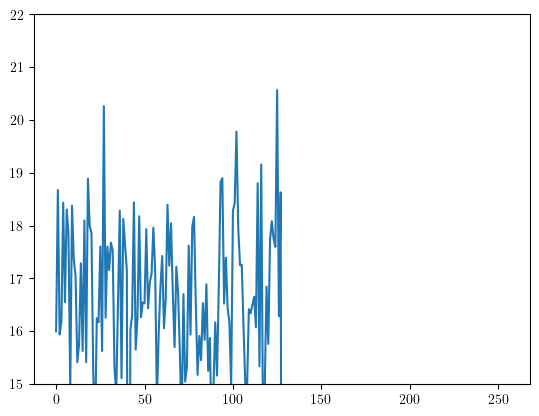

In [15]:
ind_best = np.flip(np.argsort(val_loss_all))

